<a href="https://colab.research.google.com/github/BurhanuddinLatsaheb/-CIFAR-10/blob/main/CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CIFAR 10 DATASET : 
It is a subset of Cifar 100 dataset . It contains 60000 32 x 32 RGB images. It has images distributed in 10 different classes : 
['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']   

1) Airplane

2) Automobile

3) Bird

4) Cat

5) Deer

6) Dog

7) Frog

8) Horse

9) Ship

10) Truck


Number of Training images  = 50000 images

Number of Testing images = 10000 images



# Importing the necessary libraries

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Dense , GlobalAveragePooling2D , Flatten , Dropout
from keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random


## Loading the cifar 10 data set 

In [ ]:
(X_train,y_train) , (X_test , y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 5s 0us/step


In [ ]:
# Splitting the train dataset into train and valid dataset
X_train,X_val = X_train[5000:] , X_train[:5000]
y_train , y_val = y_train[5000:] , y_train[:5000]

In [85]:
# Changing the datatype of images and normalizing the images b/w 0 & 1
X_train = X_train.astype("float")
X_test = X_test.astype("float")
X_val = X_val.astype("float")
X_train = X_train/255.
X_test = X_test/255.
X_val = X_val/255.

In [86]:
print(f"Shape of training images : {X_train.shape} \t, dtype  : {X_train.dtype}")
print(f"Shape of training labels : {y_train.shape} \t\t, dtype  : {y_train.dtype}")
print(f"Shape of valid images    : {X_val.shape}   \t, dtype  : {X_val.dtype}")
print(f"Shape of valid labels    : {y_val.shape}   \t\t, dtype  : {y_val.dtype}")
print(f"Shape of testing images  : {X_test.shape}  \t, dtype  : {X_test.dtype}")
print(f"Shape of testing labels  : {y_test.shape}  \t\t, dtype  : {y_test.dtype}")

Shape of training images : (45000, 32, 32, 3) 	, dtype  : float64
Shape of training labels : (45000, 1) 		, dtype  : uint8
Shape of valid images    : (5000, 32, 32, 3)   	, dtype  : float64
Shape of valid labels    : (5000, 1)   		, dtype  : uint8
Shape of testing images  : (10000, 32, 32, 3)  	, dtype  : float64
Shape of testing labels  : (10000, 1)  		, dtype  : uint8


# Visuliazing the data

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

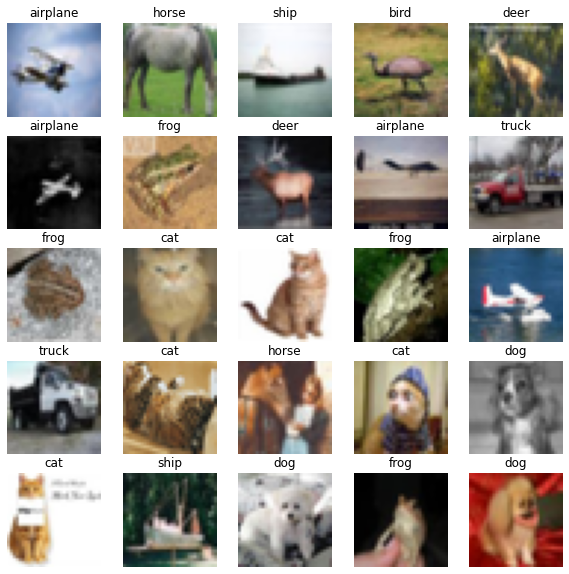

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    num = random.randint(0,len(X_train))
    plt.subplot(5,5,i+1)
    plt.title(class_names[tf.squeeze(y_train[num])])
    plt.imshow(X_train[num])
    plt.axis(False)
    
# show the figure
plt.show()

## Models


  # **Model 1**

5 blocks of VGG16 architecture

1 Dense Layer

acivation function = ReLU and softmax

loss function = Sparse Categorical Cross 

Oprimizer = SGD with lr =0.001 and momentum =0.9

epochs = 30

In [ ]:
model_1 = tf.keras.Sequential([  
    tf.keras.layers.Input( (32, 32, 3) ),
    tf.keras.layers.Lambda(lambda image: tf.image.resize(image, (224,224))),
    Conv2D(32,3 , padding = "same" , activation = "relu"),
    Conv2D(32,3,padding = "same" ,activation = "relu"),
    MaxPooling2D(2),
    Conv2D(64,3,padding = "same" , activation = "relu"),
    Conv2D(64,3,padding = "same" , activation = "relu"),
    MaxPooling2D(2),
    Conv2D(128,3,padding = "same" , activation = "relu"),
    Conv2D(128,3,padding = "same" , activation = "relu"),
    MaxPooling2D(2),
    Conv2D(256,3,padding = "same" , activation = "relu"),
    Conv2D(256,3,padding = "same" , activation = "relu"),
    MaxPooling2D(2),
    Conv2D(512,3,padding = "same" , activation = "relu"),
    Conv2D(512,3,padding = "same" , activation = "relu"),
    MaxPooling2D(2),
    Flatten(),
    Dense(10,activation = "softmax")
])

In [ ]:
model_1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.SGD(lr = 0.001 , momentum  = 0.9),
               metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
history_1  = model_1.fit(X_train , y_train , epochs = 30 , validation_data = (X_val , y_val))

Epoch 1/30
1407/1407 [==============================] - 195s 137ms/step - loss: 1.7510 - accuracy: 0.3723 - val_loss: 1.3833 - val_accuracy: 0.5114
Epoch 2/30
1407/1407 [==============================] - 194s 138ms/step - loss: 1.2382 - accuracy: 0.5654 - val_loss: 1.1145 - val_accuracy: 0.6036
Epoch 3/30
1407/1407 [==============================] - 195s 138ms/step - loss: 0.9408 - accuracy: 0.6762 - val_loss: 0.9593 - val_accuracy: 0.6754
Epoch 4/30
1407/1407 [==============================] - 195s 139ms/step - loss: 0.7330 - accuracy: 0.7500 - val_loss: 0.8688 - val_accuracy: 0.7112
Epoch 5/30
1407/1407 [==============================] - 195s 139ms/step - loss: 0.5762 - accuracy: 0.8035 - val_loss: 0.7756 - val_accuracy: 0.7494
Epoch 6/30
1407/1407 [==============================] - 195s 138ms/step - loss: 0.4325 - accuracy: 0.8512 - val_loss: 0.7902 - val_accuracy: 0.7392
Epoch 7/30
1407/1407 [==============================] - 195s 138ms/step - loss: 0.3238 - accuracy: 0.8880 - val_

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-02-08 17:33:55--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-02-08 17:33:55 (106 MB/s) - ‘helper_functions.py’ saved [10246/10246]



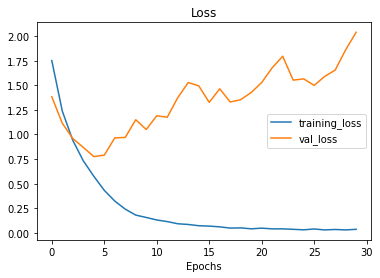

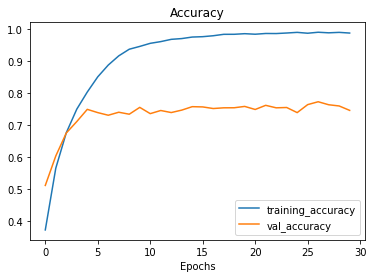

In [ ]:
from helper_functions import plot_loss_curves
plot_loss_curves(history_1)

In [ ]:
model_1.save("model_1.h5")

 # **Model 2**

3 blocks of VGG16 architecture

2 Dense Layers

4 Droput layers

acivation function = ReLU and softmax

loss function = Sparse Categorical Cross 

Oprimizer = SGD with lr =0.001 and momentum =0.9

epochs = 30

In [ ]:
model_2 = tf.keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu',  padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu',  padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(128, (3, 3), activation='relu',  padding='same'),
    Conv2D(128, (3, 3), activation='relu',  padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.2),
    Dense(10,activation="softmax")
                     
  ])
	# compile model
	

In [ ]:
model_2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(lr=0.001,momentum = 0.9),
                metrics = ["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
history_2 = model_2.fit(X_train,y_train,
                        epochs =30,
                        validation_data = (X_val,y_val))

Epoch 1/30
1407/1407 [==============================] - 9s 6ms/step - loss: 2.0648 - accuracy: 0.2454 - val_loss: 1.8168 - val_accuracy: 0.3544
Epoch 2/30
1407/1407 [==============================] - 8s 6ms/step - loss: 1.6553 - accuracy: 0.3891 - val_loss: 1.4272 - val_accuracy: 0.4914
Epoch 3/30
1407/1407 [==============================] - 8s 6ms/step - loss: 1.4623 - accuracy: 0.4727 - val_loss: 1.3654 - val_accuracy: 0.5060
Epoch 4/30
1407/1407 [==============================] - 8s 6ms/step - loss: 1.3036 - accuracy: 0.5343 - val_loss: 1.1054 - val_accuracy: 0.6096
Epoch 5/30
1407/1407 [==============================] - 8s 6ms/step - loss: 1.1986 - accuracy: 0.5763 - val_loss: 1.0594 - val_accuracy: 0.6258
Epoch 6/30
1407/1407 [==============================] - 8s 6ms/step - loss: 1.1066 - accuracy: 0.6144 - val_loss: 0.9882 - val_accuracy: 0.6672
Epoch 7/30
1407/1407 [==============================] - 8s 6ms/step - loss: 1.0265 - accuracy: 0.6372 - val_loss: 0.9479 - val_accuracy:

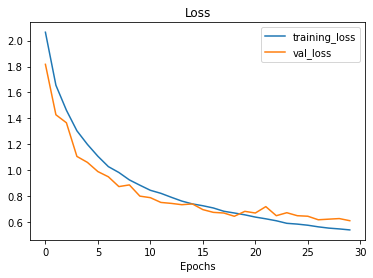

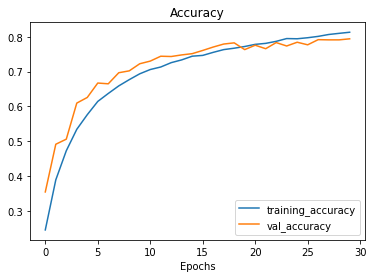

In [ ]:
from helper_functions import plot_loss_curves
plot_loss_curves(history_2)

In [ ]:
model_2.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6574 - accuracy: 0.7824


[0.6573703289031982, 0.7824000120162964]

In [ ]:
model_2.save("model_2.h5")

# **Model 3**

5 blocks of VGG16 architecture

2 Dense Layer

1 Droput layer

acivation function = ReLU and softmax

loss function = Sparse Categorical Crossentropy 

Oprimizer = SGD with lr =0.001 and momentum =0.9

epochs = 30

In [ ]:
model_3 = tf.keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu',  padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu',  padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu',  padding='same'),
    Conv2D(128, (3, 3), activation='relu',  padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu',  padding='same'),
    Conv2D(256, (3, 3), activation='relu',  padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(512, (3, 3), activation='relu',  padding='same'),
    Conv2D(512, (3, 3), activation='relu',  padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.2),
    Dense(10,activation="softmax")
                     
  ])

In [ ]:
model_3.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(lr =0.001 , momentum =0.9),
                metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
history_3 = model_3.fit(X_train,y_train, epochs=30, validation_data=(X_val, y_val))

Epoch 1/30
1407/1407 [==============================] - 17s 11ms/step - loss: 1.7387 - accuracy: 0.3602 - val_loss: 1.3410 - val_accuracy: 0.5200
Epoch 2/30
1407/1407 [==============================] - 16s 11ms/step - loss: 1.2925 - accuracy: 0.5390 - val_loss: 1.1734 - val_accuracy: 0.5942
Epoch 3/30
1407/1407 [==============================] - 16s 11ms/step - loss: 1.0633 - accuracy: 0.6282 - val_loss: 1.0882 - val_accuracy: 0.6148
Epoch 4/30
1407/1407 [==============================] - 16s 11ms/step - loss: 0.9046 - accuracy: 0.6867 - val_loss: 0.9408 - val_accuracy: 0.6692
Epoch 5/30
1407/1407 [==============================] - 15s 11ms/step - loss: 0.7891 - accuracy: 0.7285 - val_loss: 0.8215 - val_accuracy: 0.7176
Epoch 6/30
1407/1407 [==============================] - 15s 11ms/step - loss: 0.6910 - accuracy: 0.7625 - val_loss: 0.8236 - val_accuracy: 0.7122
Epoch 7/30
1407/1407 [==============================] - 15s 11ms/step - loss: 0.6073 - accuracy: 0.7904 - val_loss: 0.8062 -

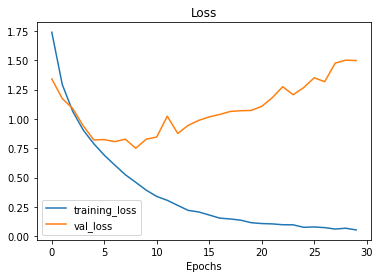

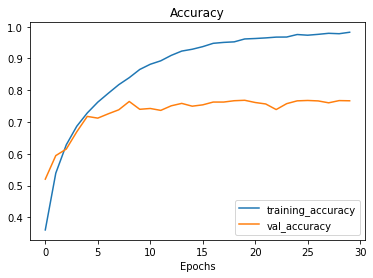

In [ ]:
plot_loss_curves(history_3)

# **Model 4**

5 blocks of VGG16 architecture

2 Dense Layers

6 Droput layers

acivation function = ReLU and softmax

loss function = Sparse Categorical Crossentropy 

Oprimizer = SGD with lr =0.0005 and momentum =0.9

epochs = 30

In [67]:
model_4 = tf.keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu',  padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu',  padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.4),
    Conv2D(128, (3, 3), activation='relu',  padding='same'),
    Conv2D(128, (3, 3), activation='relu',  padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(256, (3, 3), activation='relu',  padding='same'),
    Conv2D(256, (3, 3), activation='relu',  padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Conv2D(512, (3, 3), activation='relu',  padding='same'),
    Conv2D(512, (3, 3), activation='relu',  padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.4),
    Dense(10,activation="softmax")
                     
  ])

In [68]:
model_4.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(lr =0.0005 , momentum =0.9),
                metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [69]:
history_4 = model_4.fit(X_train,y_train, epochs=30, validation_data=(X_val, y_val))

Epoch 1/30
1407/1407 [==============================] - 24s 15ms/step - loss: 2.1991 - accuracy: 0.1553 - val_loss: 1.9843 - val_accuracy: 0.2282
Epoch 2/30
1407/1407 [==============================] - 16s 12ms/step - loss: 1.9474 - accuracy: 0.2268 - val_loss: 1.8398 - val_accuracy: 0.2938
Epoch 3/30
1407/1407 [==============================] - 16s 11ms/step - loss: 1.8077 - accuracy: 0.3019 - val_loss: 1.6727 - val_accuracy: 0.3936
Epoch 4/30
1407/1407 [==============================] - 16s 11ms/step - loss: 1.6678 - accuracy: 0.3688 - val_loss: 1.5605 - val_accuracy: 0.4376
Epoch 5/30
1407/1407 [==============================] - 17s 12ms/step - loss: 1.5450 - accuracy: 0.4306 - val_loss: 1.3525 - val_accuracy: 0.5096
Epoch 6/30
1407/1407 [==============================] - 16s 11ms/step - loss: 1.4493 - accuracy: 0.4729 - val_loss: 1.2744 - val_accuracy: 0.5462
Epoch 7/30
1407/1407 [==============================] - 16s 11ms/step - loss: 1.3579 - accuracy: 0.5097 - val_loss: 1.2793 -

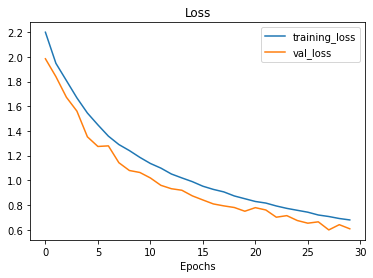

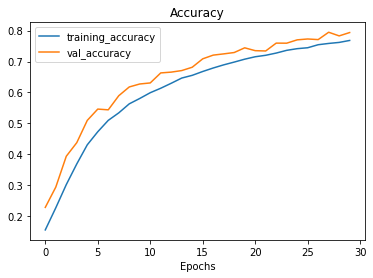

In [70]:
plot_loss_curves(history_4)

# **Model 5**

5 blocks of VGG16 architecture

3 Dense Layer

7 Droput layer

acivation function = ReLU and softmax

loss function = Sparse Categorical Crossentropy 

Oprimizer = SGD with lr =0.001 and momentum =0.9

epochs = 100

In [72]:
model_5 = tf.keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu',  padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu',  padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.4),
    Conv2D(128, (3, 3), activation='relu',  padding='same'),
    Conv2D(128, (3, 3), activation='relu',  padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(256, (3, 3), activation='relu',  padding='same'),
    Conv2D(256, (3, 3), activation='relu',  padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Conv2D(512, (3, 3), activation='relu',  padding='same'),
    Conv2D(512, (3, 3), activation='relu',  padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.4),
    Dense(64, activation = "relu"),
    Dropout(0.2),
    Dense(10,activation="softmax")
                     
  ])

In [74]:
model_5.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(lr =0.001 , momentum =0.9),
                metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [75]:
history_5 = model_5.fit(X_train,y_train, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
1407/1407 [==============================] - 18s 12ms/step - loss: 2.2265 - accuracy: 0.1484 - val_loss: 2.2136 - val_accuracy: 0.1496
Epoch 2/100
1407/1407 [==============================] - 16s 11ms/step - loss: 2.0200 - accuracy: 0.1967 - val_loss: 1.9284 - val_accuracy: 0.2370
Epoch 3/100
1407/1407 [==============================] - 16s 11ms/step - loss: 1.9270 - accuracy: 0.2348 - val_loss: 1.8054 - val_accuracy: 0.2892
Epoch 4/100
1407/1407 [==============================] - 16s 12ms/step - loss: 1.8024 - accuracy: 0.3020 - val_loss: 1.7400 - val_accuracy: 0.3408
Epoch 5/100
1407/1407 [==============================] - 16s 11ms/step - loss: 1.7006 - accuracy: 0.3500 - val_loss: 1.5887 - val_accuracy: 0.3970
Epoch 6/100
1407/1407 [==============================] - 16s 11ms/step - loss: 1.6063 - accuracy: 0.3910 - val_loss: 1.5327 - val_accuracy: 0.4178
Epoch 7/100
1407/1407 [==============================] - 16s 11ms/step - loss: 1.5254 - accuracy: 0.4329 - val_loss: 1

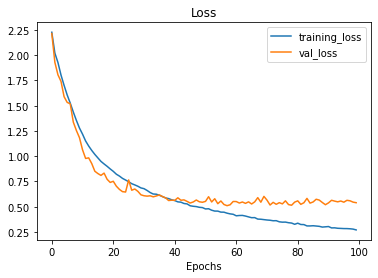

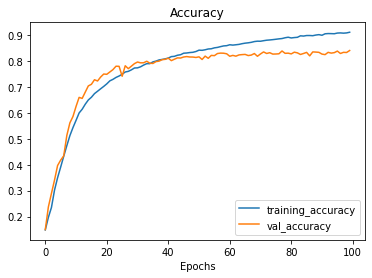

In [76]:
plot_loss_curves(history_5)

In [77]:
model_5.evaluate(X_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.5798 - accuracy: 0.8334


[0.5798326730728149, 0.8334000110626221]

In [78]:
model_3.save("model_3.h5")

In [79]:
model_4.save("model_4.h5")

In [82]:
model_5.save("model_5.h5")